### Zad1

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d

# tworzymy tablice o wymiarach 128x128x3 (3 kanaly to RGB)
# uzupelnioną zerami = kolor czarny
data = np.zeros((128, 128, 3), dtype=np.uint8)

# chcemy zeby obrazek byl czarnobialy,
# wiec wszystkie trzy kanaly rgb uzupelniamy tymi samymi liczbami
# napiszmy do tego funkcje
def draw(img, x, y, color):
    img[x, y] = [color, color, color]


# zamalowanie 4 pikseli w lewym górnym rogu
draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)


# rysowanie kilku figur na obrazku
for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)

#### a

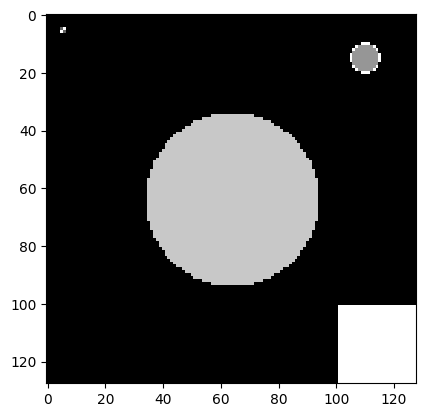

In [2]:
# konwersja macierzy na obrazek i wyświetlenie
plt.imshow(data, interpolation='nearest')
plt.show()

#### b

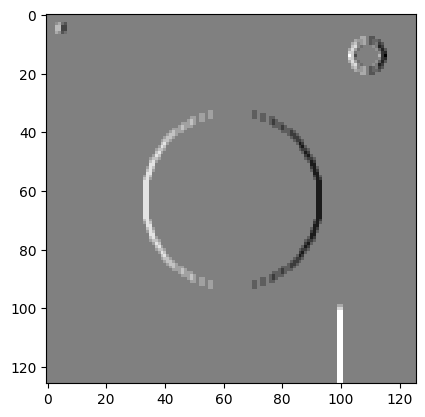

In [15]:
gray_data = np.mean(data, axis=2)
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
b = convolve2d(gray_data, kernel, mode='valid')

plt.imshow(b, cmap='gray', interpolation='nearest')
plt.show()

#### c

In [9]:
gray_data = np.mean(data, axis=2)
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
c = convolve2d(gray_data, kernel, mode='valid', stride=2)

plt.imshow(c, cmap='gray', interpolation='nearest')
plt.show()

TypeError: convolve2d() got an unexpected keyword argument 'stride'

#### d

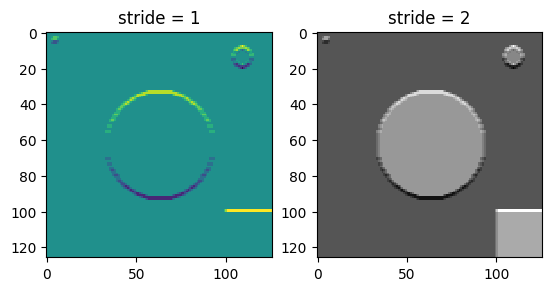

In [8]:
gray_data = np.mean(data, axis=2)
kernel1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernel2 = np.array([[2, 2, 2], [0, 0, 0], [-1, -1, -1]])
d1 = convolve2d(gray_data, kernel1, mode='valid')
d2 = convolve2d(gray_data, kernel2, mode='valid')

plt.subplot(1, 2, 1)
plt.imshow(d1, interpolation='nearest')
plt.title('stride = 1')
plt.subplot(1, 2, 2)
plt.imshow(d2, cmap='gray', interpolation='nearest')
plt.title('stride = 2')
plt.show()

#### e